# Movie Recommendation System

![movie_catalog](Images/catalog_pics.jpg)

## Overview
Movie recommendation systems are like friendly guides that help you discover new films you'll love. Imagine a world with thousands of movies to choose from; it can be overwhelming. That's where recommendation systems come in. They use clever math and your past movie preferences to suggest films you might enjoy. These systems make your movie-watching experience more enjoyable by saving you time and introducing you to movies you might have never found on your own.

## Business Understanding
Competition among movie companies in today's digital landscape is more intense than ever before. With a vast array of streaming platforms and content providers vying for viewers' attention, the role of a robust movie recommendation system becomes paramount. Such systems offer a competitive edge by enhancing user engagement and satisfaction. They do this by leveraging sophisticated algorithms to analyze user preferences, viewing history, and ratings, ensuring that viewers are consistently presented with content that aligns with their tastes. 

This personalization not only keeps viewers engaged but also helps companies differentiate themselves in a crowded market. By recommending content that resonates with individual viewers, companies can increase customer retention, drive user loyalty, and ultimately outperform their competitors. Furthermore, recommendation systems can aid in content discovery, ensuring that lesser-known titles have a chance to shine, thus diversifying a company's content portfolio and attracting a broader audience. 

### Problem Statement
The problem at hand revolves around the development of an effective movie recommendation system that caters to the diverse preferences of users based on their past movie ratings. In the era of digital streaming platforms and an ever-expanding catalog of movies, users are often overwhelmed by choice and may struggle to discover content aligned with their tastes. This leads to reduced user engagement and satisfaction, potentially impacting the success of the movie platform.

Have you ever spent a lot of time scrolling through a movie streaming service, unsure of what to watch because there are so many options? This happens because there are thousands of movies available, and it's hard to pick the right one. My project aims to solve this problem. By using data about what movies people have rated highly in the past, we can suggest the top 5 movies that each person is likely to enjoy. This way, users don't have to spend a long time searching, and they can start watching a movie they'll probably love right away.

The ultimate goal of this project is to make the experience of choosing and watching movies more enjoyable for users.I want to help people discover new movies they might not have found on their own and keep them engaged with the platform. Additionally, the aim is to benefit the movie platform itself by increasing user satisfaction and retention. When users find movies they love more easily, they're more likely to keep using the service, which can lead to more success for the platform in a competitive market. So, our project isn't just about recommending movies; it's about enhancing the overall movie-watching experience for everyone.

The core problem statement is to create a robust recommendation model that can analyze user-provided movie ratings and, leveraging advanced algorithms, generate a list of the top 5 movie recommendations that resonate with each user's unique preferences.


#### In summary, my goals include:

* **Data Collection:**
Gather a dataset containing information on movies, user ratings, and user profiles.

* **Data Preprocessing:**
Clean and preprocess the dataset to handle missing values, remove duplicates, and format it for analysis.

* **User Profiling:** 
Understand each user's preferences by analyzing their past movie ratings.

* **Model Building:**
Develop a recommendation model which uses collaborative filtering to generate personalized movie recommendations.

* **Evaluation:**
Assess the model's performance using appropriate evaluation metrics such as accuracy, RMSE or MAE.

## Data Understanding
For this project, I am provided with two datasets. The first dataset, which I'll refer to as the "Movie Data" dataset, contains key information about movies. It comprises three columns: 'movieId,' 'title,' and 'genres.' The 'movieId' column serves as a unique identifier for each movie, ensuring data integrity and facilitating linkage with other datasets. The 'title' column stores the titles of the movies, providing clear identification and labeling for each entry. Meanwhile, the 'genres' column categorizes movies into different genres, offering insights into the content and style of each film.

The second dataset, which I'll refer to as the "User Rating Data" dataset, captures user interactions with movies, specifically their ratings. It consists of three columns: 'userId,' 'movieId,' and 'rating.' The 'userId' column represents unique user identifiers, enabling the association of each rating with a specific user. The 'movieId' column links each rating to a movie in the Movie Data dataset, facilitating the creation of user-movie relationships. The 'rating' column stores user-assigned ratings, typically on a numerical scale, indicating user preferences for movies. This dataset is instrumental in building collaborative filtering models, as it forms the basis for understanding user behavior and preferences. It allows the system to recommend movies to users based on the ratings and preferences of similar users, enhancing personalization and user satisfaction in the movie recommendation process.

## Data Preparation
I first import the relevant packages:

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing the surprise modules
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV, train_test_split
from surprise.accuracy import rmse

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#setting style
plt.style.use("seaborn-v0_8-darkgrid")

#enabling inline plotting
%matplotlib inline

Loading the user ratings dataset and previewing the first five columns:

In [70]:
ratings = pd.read_csv('data/ratings.csv')

#first five columns
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


From the columns above, in this project I will not need the `timestamp` column and so I'll drop it. 

In [71]:
#dropping the timestamp column and previewing the data again
user_rating = ratings.drop('timestamp', axis =1)
user_rating.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


A brief information about the columns and number of rows present:

In [72]:
user_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


Loading the movie titles dataset:

In [73]:
movie_titles = pd.read_csv('data/movies.csv')
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


This dataset contains the movieId and title of each movie based on their Ids. This will be important when making recommendations for unrated movies to a user.

Checking the info of this dataset:

In [74]:
#info
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


### Checking for missing values in both datasets
The datasets may contain missing values which may become a problem when trying to build a model.

In [75]:
#checking missing values in user ratings data
user_rating.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

The user ratings dataset does not have missing values. Now I check missing values in the movie title dataset.

In [76]:
#missing values in movie title df
movie_titles.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

This dataset as well does not have any missing values.

### Checking for duplicates
The dataset may as well contain duplicates hence this step is necessary.

In [77]:
#checking for duplicates in user rating dataframe
user_rating.duplicated().value_counts()

False    100836
Name: count, dtype: int64

The user ratings columns doesn't have any duplicates. That's good. I now check for duplicates in the movie titles dataframe.

In [78]:
#checking for duplicates
movie_titles.duplicated().value_counts()

False    9742
Name: count, dtype: int64

This dataset as well doesn't have any duplicates.

### Transforming user ratings dataframe to Surprise

It's now time to transform the dataset into something compatible with `surprise`. In order to do this, I am going to use `Reader` and `Dataset` classes.

In [79]:
# reading in values as Surprise Dataset
reader = Reader()
data = Dataset.load_from_df(user_rating[['userId', 'movieId', 'rating']], reader)

Splitting the dataset into trainset and testset.

In [80]:
trainset, testset = train_test_split(data, test_size=0.2)

#number of users and items in trainset
print('Number of users: ', trainset.n_users, '\n')
print('Number of items: ', trainset.n_items)

Number of users:  610 

Number of items:  8964


Calling the data, we can see that it is indeed a surprise dataset.

In [81]:
data

### User Profiling
Before beginning modeling, I added this extra step as one of the goals of this project to sample a random user and preview what movie genres they like. This is the user I will be making 5 recommendations for. I will want to see if the model makes accurate predictions on the movies this user may like based on their genres.

#### Sampling a random user

In [82]:
#setting random seed for reproducibility
np.random.seed(54)
user_rating.sample(1)

,userId,movieId,rating
68102,438,7444,3.0


In [83]:
#storing this user id
user = 438

#### Identifying the highly rated movies based on genre
To do this, I will join the movie title dataframe on the user ratings dataset specifically for `user 438` focussing mostly on the genre.

In [84]:
#creating dataframe for user 438 only
user438 = user_rating.loc[user_rating['userId'] == user]
user438

,userId,movieId,rating
67583,438,1,4.5
67584,438,6,5.0
67585,438,10,4.0
67586,438,11,4.0
67587,438,19,3.0
...,...,...,...
68213,438,48516,4.5
68214,438,48774,3.0
68215,438,48780,4.0
68216,438,49272,4.0


This user has rated 635 movie titles. Now let me do the join.

In [85]:
# Merge user438s with movie titles
user438_movie_ratings = pd.merge(user438, movie_titles, on='movieId')
user438_movie_ratings

,userId,movieId,rating,title,genres
0,438,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,438,6,5.0,Heat (1995),Action|Crime|Thriller
2,438,10,4.0,GoldenEye (1995),Action|Adventure|Thriller
3,438,11,4.0,"American President, The (1995)",Comedy|Drama|Romance
4,438,19,3.0,Ace Ventura: When Nature Calls (1995),Comedy
...,...,...,...,...,...
630,438,48516,4.5,"Departed, The (2006)",Crime|Drama|Thriller
631,438,48774,3.0,Children of Men (2006),Action|Adventure|Drama|Sci-Fi|Thriller
632,438,48780,4.0,"Prestige, The (2006)",Drama|Mystery|Sci-Fi|Thriller
633,438,49272,4.0,Casino Royale (2006),Action|Adventure|Thriller


#### Plotting highly rated genres for user 438

In [86]:
#user438 ten highest rated genres 
user438_ratings = user438_movie_ratings.sort_values(by = 'rating', ascending = False).head(10)
user438_ratings

,userId,movieId,rating,title,genres
634,438,51662,5.0,300 (2007),Action|Fantasy|War|IMAX
493,438,7090,5.0,Hero (Ying xiong) (2002),Action|Adventure|Drama
462,438,6539,5.0,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy
426,438,5903,5.0,Equilibrium (2002),Action|Sci-Fi|Thriller
69,438,589,5.0,Terminator 2: Judgment Day (1991),Action|Sci-Fi
34,438,260,5.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
1,438,6,5.0,Heat (1995),Action|Crime|Thriller
39,438,318,5.0,"Shawshank Redemption, The (1994)",Crime|Drama
289,438,3996,5.0,"Crouching Tiger, Hidden Dragon (Wo hu cang lon...",Action|Drama|Romance
253,438,3578,5.0,Gladiator (2000),Action|Adventure|Drama


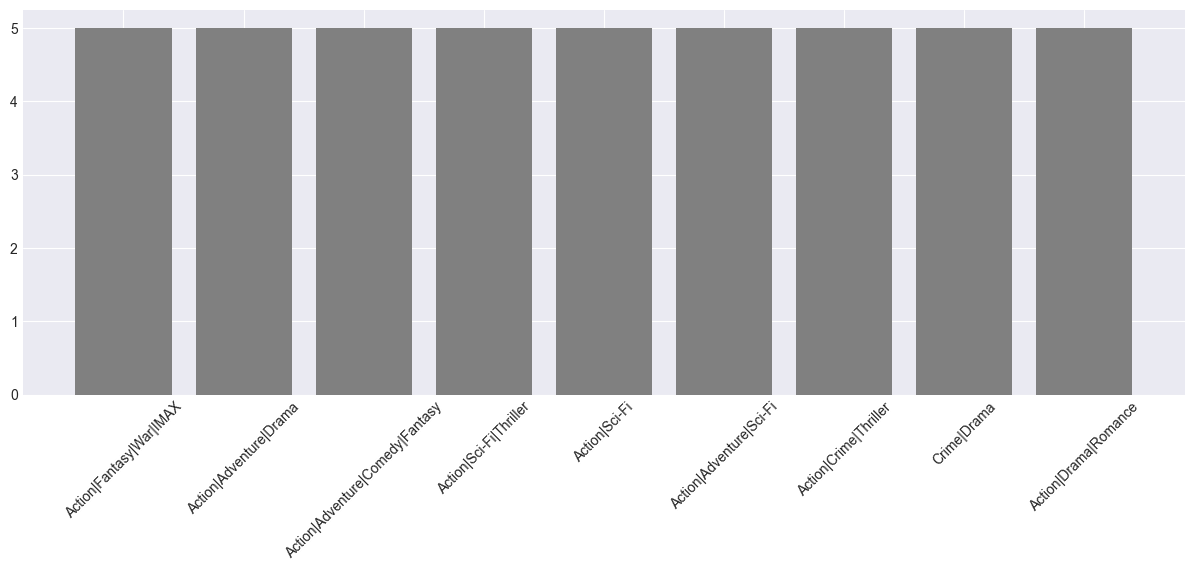

In [87]:
#plotting bar plot
plt.figure(figsize = (15,5))
plt.bar(user438_ratings['genres'], user438_ratings['rating'], color = 'grey')
plt.xticks(rotation = 45);

From the plot above, these are the highly rated genres for `user 438`.

## Modeling

### Baseline Model
In this project, I'll use Singular Value Decomposition (SVD), a matrix factorization technique, to build the recommendation system. I'll start with a baseline model, assess it's performance, and then tune the model with grid search to obtain the best parameters.

In [88]:
#initialising baseline model with default parameters
baseline = SVD()

Fitting the model on my trainset.

In [89]:
baseline.fit(trainset)

Obtaining predictions for both the trainset and test set to assess the rmse scores.

In [90]:
#predictions
preds = baseline.test(testset)

#### Evaluating the model's accuracy using RMSE.

In [91]:
#rmse score
base_rmse = rmse(preds)
base_rmse

RMSE: 0.8699


0.8698845248707412

Performing a cross validation using 5 k-folds.

In [92]:
cv_results = cross_validate(baseline, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8798  0.8738  0.8669  0.8734  0.8741  0.8736  0.0041  
Fit time          1.43    1.38    1.52    1.32    1.31    1.39    0.08    
Test time         0.14    0.16    0.14    0.15    0.13    0.14    0.01    


In [93]:
# printing out the average RMSE score for the test set
print('test_rmse = ', cv_results['test_rmse'].mean()*100,'%')

test_rmse =  87.35719000548505 %


From the RMSE score above, the model was able to predict accurately about 87% of the movie ratings for each user. 
Now tuning the model using gridsearch:

### Determining the best parameters with Grid Search

In [94]:
#the parameter grid
param_grid = {'n_factors':[50,100,200],
              'reg_all': [0.005,0.05,0.5],
             'lr_all': [0.002, 0.005, 0.01]}

#iimporting SVD class again
from surprise.prediction_algorithms import SVD

#initialising grid search
gridsearch = GridSearchCV(SVD,param_grid, n_jobs = -1, joblib_verbose= 5)
gridsearch.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   28.7s finished


In [95]:
#obtaining the best parameters
gridsearch.best_params

{'rmse': {'n_factors': 200, 'reg_all': 0.05, 'lr_all': 0.01},
 'mae': {'n_factors': 200, 'reg_all': 0.05, 'lr_all': 0.01}}

From the grid search above, the best parameters are `'n_factors': 200, 'reg_all': 0.05, 'lr_all': 0.01`

### Building the Final Model
For the final model I will use these best parameters to build a more accurate model.

In [96]:
#initialising final model with best params
final_model = SVD(n_factors= 200, reg_all= 0.005, lr_all= 0.01)

Fitting the final model on the trainset

In [97]:
final_model.fit(trainset)

#### Evaluating the model performance using RMSE

In [98]:
#using 5 kfold cross validation
cv_results = cross_validate(final_model, data, measures=['RMSE'], cv=5, verbose=True)['test_rmse']
print('test_rmse = ', cv_results.mean()*100,'%')

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9069  0.9165  0.9104  0.9060  0.9086  0.9097  0.0037  
Fit time          2.13    2.27    2.06    1.93    2.17    2.11    0.11    
Test time         0.23    0.11    0.14    0.19    0.11    0.15    0.05    
test_rmse =  90.9683058378848 %


From the results above, this model is 91% accurate. It has performed way better than the baseline model which was 87% accurate. 

### Making recommendations:
Remember we sampled `user438`. Now let me make predictions for this user's ratings on unwatched movies and make recommendations based on movies with the highest rating. 

In [99]:
#user id
user

438

In [100]:
#user438 ratings predictions
user_id = user

#creating a list for unrated movies
unrated_movies_ids = [movie_id for movie_id in movie_titles.movieId if movie_id not in user_rating]

#creating a list for predictions
user_predictions = []

#looping through all movie ids
for movie_id in unrated_movies_ids:
    predicted = final_model.predict(user_id, movie_id).est
    
    #appending the results to the list
    user_predictions.append((movie_id, predicted))
    
#calling the prediction results and printing first 50 results   
user_predictions[:50]

[(1, 4.236543213143166),
 (2, 2.9127872809000745),
 (3, 3.712317089509277),
 (4, 2.5846459694632795),
 (5, 3.070851010644492),
 (6, 5),
 (7, 3.1278451300465377),
 (8, 2.9342617474221755),
 (9, 2.726976862385494),
 (10, 4.06350344593533),
 (11, 3.9837634232169665),
 (12, 2.6090323384816396),
 (13, 3.234471696358982),
 (14, 3.548033169548046),
 (15, 3.5904118900534),
 (16, 3.7896706010476207),
 (17, 3.0261216978819534),
 (18, 2.9793739021578536),
 (19, 3.073075422097717),
 (20, 2.7139826868089507),
 (21, 3.2088154998097926),
 (22, 3.298601519949902),
 (23, 2.6862708323437587),
 (24, 3.1579730767988248),
 (25, 3.8149698819936897),
 (26, 3.7878786161731535),
 (27, 3.4073556702641823),
 (28, 3.881258747780761),
 (29, 4.12917862428418),
 (30, 3.109190159974683),
 (31, 2.462605730652347),
 (32, 3.663615421139861),
 (34, 3.279270574993538),
 (36, 3.821120344165872),
 (38, 3.3001190131322113),
 (39, 2.6161366872369167),
 (40, 3.648594087000742),
 (41, 2.7743255358365286),
 (42, 3.36898257366438

Ranking these predictions from highest to lowest.

In [101]:
#sorting the predictions by the highest rated to lowest rated
ranked_predictions = sorted(user_predictions, key = lambda x: x[1], reverse = True)

#printing the top 50 rated movie ids
ranked_predictions[:50]

[(6, 5),
 (296, 5),
 (1287, 5),
 (2571, 5),
 (5903, 5),
 (119145, 5),
 (380, 4.929842012977505),
 (1196, 4.926199598759597),
 (1617, 4.922940628216866),
 (318, 4.895665306644848),
 (6539, 4.875789220433849),
 (46965, 4.845510474186365),
 (1036, 4.8357917744822005),
 (34338, 4.820552750362113),
 (4846, 4.818083683233736),
 (1210, 4.781331851927832),
 (6548, 4.775254940645512),
 (3996, 4.768874230444247),
 (260, 4.768458615101259),
 (6016, 4.758137929417606),
 (7090, 4.755091972934908),
 (1267, 4.744860725932552),
 (37830, 4.723247602868245),
 (589, 4.677221195565705),
 (3972, 4.67307640452351),
 (1213, 4.6571198209911495),
 (1193, 4.653034514750641),
 (110, 4.6453197778514905),
 (8961, 4.63665433544114),
 (858, 4.617567698985478),
 (71899, 4.611045471469935),
 (8949, 4.602270604991919),
 (33794, 4.585596905549105),
 (3578, 4.576247934364002),
 (1136, 4.571192708555063),
 (8636, 4.57079201189462),
 (527, 4.561061643207543),
 (1704, 4.5559859856015725),
 (2858, 4.551267140167493),
 (8368,

### Creating a function to print out n recommended movie titles
In this final step, I will define a function that will use the model predictions to recommend 5 movies to `user438`.

In [102]:
def recommended_movies(user_predictions,movie_titles,n):
    
    ranked_df = pd.DataFrame(user_predictions, columns = ['movieId', 'rating'])  
    
    # Merging user ratings with movie titles
    user_movie_ratings = pd.merge(ranked_df, movie_titles, on='movieId')
    
    # Sorting user's rated movies by their ratings in descending order (best to worst)
    user_movie_ratings = user_movie_ratings.sort_values(by='rating', ascending=False)
    
    top_n_recommendations = user_movie_ratings.head(n)

    #Printing the recommended movies
    print(f"Top {n} Recommended Movies:")
    for index, row in top_n_recommendations.iterrows():
        print(f"Movie ID: {row['movieId']}, Title: {row['title']}")

### Using the function above to make 5 recommendations:

In [103]:
#calling the function
recommended_movies(user_predictions,movie_titles,5)

Top 5 Recommended Movies:
Movie ID: 119145, Title: Kingsman: The Secret Service (2015)
Movie ID: 2571, Title: Matrix, The (1999)
Movie ID: 296, Title: Pulp Fiction (1994)
Movie ID: 6, Title: Heat (1995)
Movie ID: 5903, Title: Equilibrium (2002)


In [107]:
movie_titles.loc[(movie_titles['movieId'] == 119145) | (movie_titles['movieId'] == 2571) | (movie_titles['movieId'] == 296) | (movie_titles['movieId'] == 6) | (movie_titles['movieId'] == 5903)]

,movieId,title,genres
5,6,Heat (1995),Action|Crime|Thriller
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
4118,5903,Equilibrium (2002),Action|Sci-Fi|Thriller
8636,119145,Kingsman: The Secret Service (2015),Action|Adventure|Comedy|Crime


From the recommendations, we can see that the genres for this user's recommendation are similar to those top 10 highly rated genres I had plotted before.

### Creating one function to summarize all the steps
This function will provide 5 recommendations for any user given their user ID, movie titles available and the user's past movie ratings. In this function, I will implement again the SVD final model with the best parameters.

In [1]:
def make_5_recommendations(userId, past_user_movie_ratings, movie_titles):

    # reading in values as Surprise Dataset
    reader = Reader()
    data = Dataset.load_from_df(past_user_movie_ratings[['userId', 'movieId', 'rating']], reader)
    
    #creating dataframe for this user only
    user = past_user_movie_ratings.loc[past_user_movie_ratings['userId'] == userId]
    
    # Merge user with movie titles
    user_ratings = pd.merge(user, movie_titles, on='movieId')
    
    #creating a list for unrated movies
    unrated_movies_ids = [movie_id for movie_id in movie_titles.movieId if movie_id not in user_ratings]

    #creating a list for predictions
    user_predictions = []

    #looping through all movie ids
    for movie_id in unrated_movies_ids:
        predicted = final_model.predict(userId, movie_id).est
    
        #appending the results to the list
        user_predictions.append((movie_id, predicted))
        
    #converting predictions to a dataframe
    ranked_df = pd.DataFrame(user_predictions, columns = ['movieId', 'rating'])  
    
    # Merging user ratings with movie titles
    user_movie_ratings = pd.merge(ranked_df, movie_titles, on='movieId')
    
    # Sorting user's rated movies by their ratings in descending order (best to worst)
    user_movie_ratings = user_movie_ratings.sort_values(by='rating', ascending=False)
    
    top_5_recommendations = user_movie_ratings.head()

    #Printing the recommended movies
    print(f"Top 5 Recommended Movies:")
    for index, row in top_5_recommendations.iterrows():
        print(f"Movie ID: {row['movieId']}, Title: {row['title']}")

Applying the function to user 438 to confirm if the top 5 recommendations are same as before:

In [110]:
#aplying the function
make_5_recommendations(438, user_rating, movie_titles)

Top 5 Recommended Movies:
Movie ID: 119145, Title: Kingsman: The Secret Service (2015)
Movie ID: 2571, Title: Matrix, The (1999)
Movie ID: 296, Title: Pulp Fiction (1994)
Movie ID: 6, Title: Heat (1995)
Movie ID: 5903, Title: Equilibrium (2002)


## Evaluation

As before, here are the results on the model's accuracy in making recommendations.

In [113]:
#using 5 kfold cross validation
cv_results = cross_validate(final_model, data, measures=['RMSE'], cv=5, verbose=True)['test_rmse']
print('test_rmse = ', cv_results.mean()*100,'%')

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9123  0.9077  0.9072  0.9147  0.9121  0.9108  0.0029  
Fit time          2.13    2.09    1.95    2.15    2.21    2.11    0.09    
Test time         0.14    0.19    0.12    0.18    0.11    0.15    0.03    
test_rmse =  91.08150091595304 %


In my recommendation system, I've achieved a solid 91% accuracy, which means that it's doing a great job in suggesting movies that match users' preferences most of the time. This is a positive outcome.

## Conclusion
In this project, I have successfully developed a movie recommendation system that harnesses user ratings to suggest films. With a commendable 91% accuracy rate, the model is proficient at aligning user preferences with movie recommendations. This accuracy reflects the system's ability to assist users in discovering movies they're likely to enjoy, enhancing their overall movie-watching experience. Having a robust recommendation system plays an important role in both increasing user satisfaction and contributing to the overall success of movie platforms. A well-designed recommendation system can lead to a win-win scenario for users and the platform itself.

A good recommendation system significantly enhances user satisfaction. It does this by tailoring movie suggestions to individual preferences, making it easier for users to discover content that is in line with their tastes. This personalization minimizes the time users spend searching for movies and maximizes their time enjoying content, leading to a more enjoyable and efficient movie-watching experience. When users consistently find movies they love through the platform, they are more likely to remain engaged and loyal, which in turn increases their overall satisfaction. This, in essence, transforms casual viewers into dedicated users, promoting long-term user retention and loyalty.